CWH
通道 宽度 高度

本质
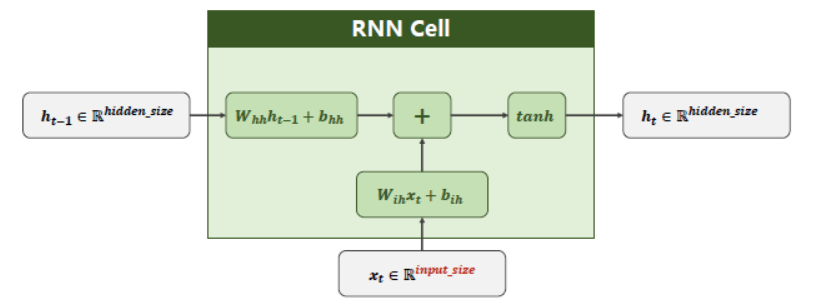

In [1]:
import torch

In [2]:
input_size = 10
hidden_size  =20
cell = torch.nn.RNNCell(input_size=input_size, hidden_size=hidden_size)

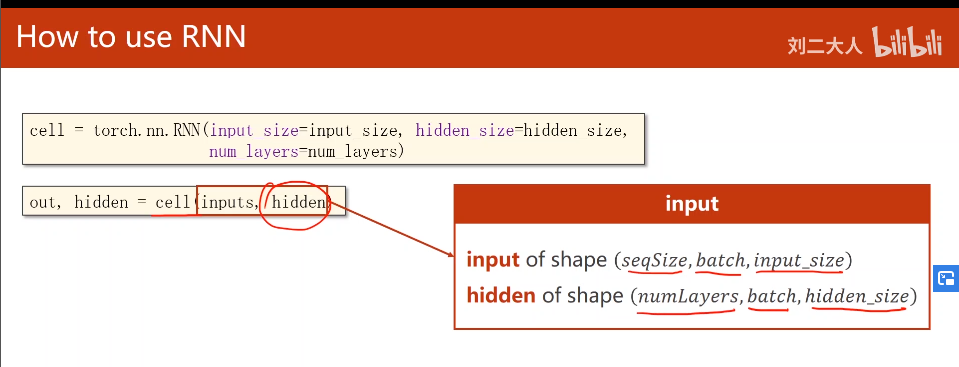


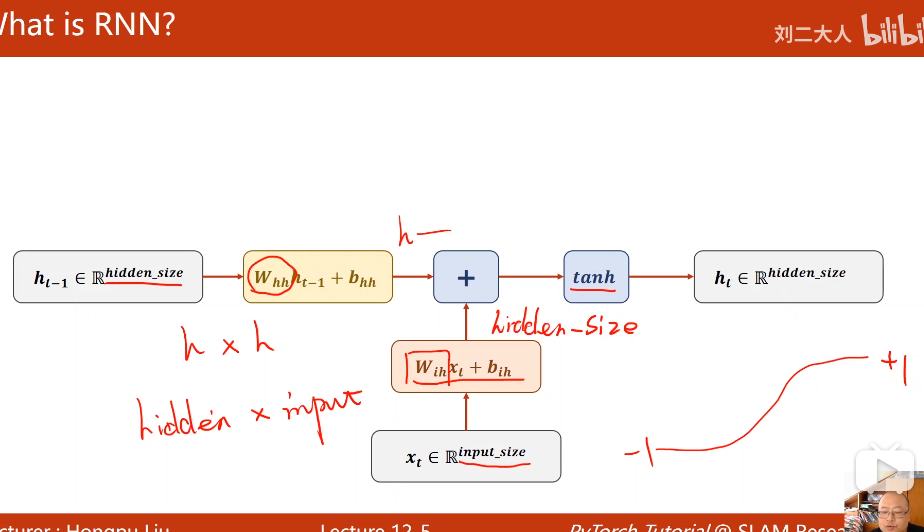

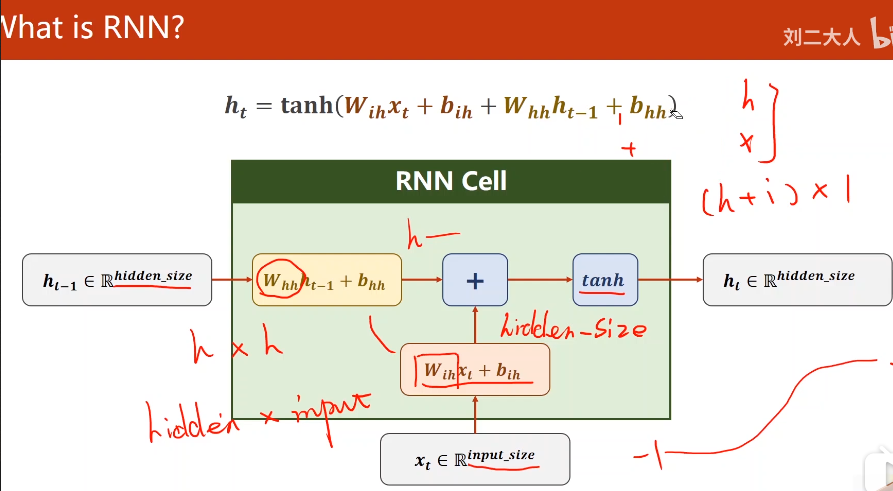

### RNNCell的用法

~~~python
cell = torch.nn.RNNCell(intput_size, hidden_size)

hidden = cell(input, hidden)
~~~
输入维度：batch, input_size

hidden维度: batch, hidden_size

输出维度：batch, hidden_size
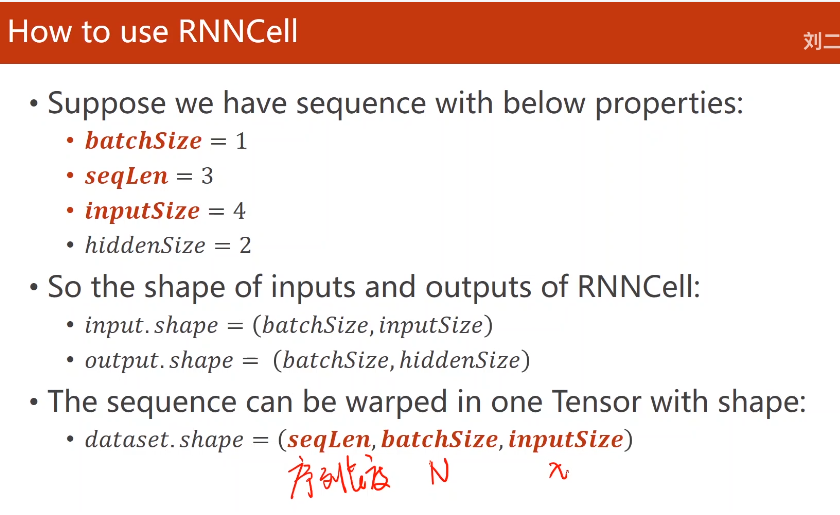

In [40]:
dataset

tensor([[[ 0.4079,  0.2037, -0.4663,  0.5800],
         [-1.9144,  1.3845,  0.6646, -0.3280]],

        [[-0.6639, -0.2344,  0.1629, -1.6565],
         [ 0.1441, -1.1772, -0.9185, -0.3524]],

        [[ 0.0807, -0.1643, -0.1465,  0.4519],
         [-0.0914,  0.6783,  2.4926, -0.4923]]])

In [41]:
hidden

tensor([[-0.2904, -0.3157,  0.4744],
        [ 0.3688, -0.7715, -0.6729]], grad_fn=<TanhBackward>)

In [36]:
# 每个input的小批量大小
batch_size = 2
# 每个数据的长度
seq_len = 3
# 有多少个input
input_size = 4
hidden_size = 3
cell = torch.nn.RNNCell(input_size=input_size, hidden_size=hidden_size,)

dataset = torch.randn(seq_len, batch_size, input_size)
hidden = torch.zeros(batch_size, hidden_size)

for idx, inputs in enumerate(dataset):
    print('*'*20, idx, '*'*20)
    print('Input size:', inputs.shape)
    print(inputs)
    # 当前隐藏层
    hidden = cell(inputs, hidden)
    
    print('outputs size:', hidden.shape)
    print(hidden)
    print('out_y size:', out.shape)
    print(out)


******************** 0 ********************
Input size: torch.Size([2, 4])
tensor([[ 0.4079,  0.2037, -0.4663,  0.5800],
        [-1.9144,  1.3845,  0.6646, -0.3280]])
outputs size: torch.Size([2, 3])
tensor([[-0.3653,  0.3419,  0.4259],
        [ 0.3101,  0.9571, -0.5155]], grad_fn=<TanhBackward>)
out_y size: torch.Size([3])
tensor([-0.4242,  0.6042, -0.3869], grad_fn=<SelectBackward>)
******************** 1 ********************
Input size: torch.Size([2, 4])
tensor([[-0.6639, -0.2344,  0.1629, -1.6565],
        [ 0.1441, -1.1772, -0.9185, -0.3524]])
outputs size: torch.Size([2, 3])
tensor([[-0.2558,  0.8169,  0.9109],
        [-0.7757,  0.6152,  0.9764]], grad_fn=<TanhBackward>)
out_y size: torch.Size([3])
tensor([-0.4242,  0.6042, -0.3869], grad_fn=<SelectBackward>)
******************** 2 ********************
Input size: torch.Size([2, 4])
tensor([[ 0.0807, -0.1643, -0.1465,  0.4519],
        [-0.0914,  0.6783,  2.4926, -0.4923]])
outputs size: torch.Size([2, 3])
tensor([[-0.2904, -

In [37]:
inputs

tensor([[ 0.0807, -0.1643, -0.1465,  0.4519],
        [-0.0914,  0.6783,  2.4926, -0.4923]])

### RNN层

In [33]:
cell = torch.nn.RNN(input_size=input_size, hidden_size=hidden_size, 
                   num_layers=num_layers)# 层数 可以累加RNN层数

In [39]:
#RNN就不用自己写循环了
cell = torch.nn.RNN(input_size=input_size,hidden_size=hidden_size,
                   num_layers=num_layers)# 有多少层RNN

out, hidden = cell(dataset, hidden)

RuntimeError: Expected hidden size (1, 2, 3), got (2, 3)

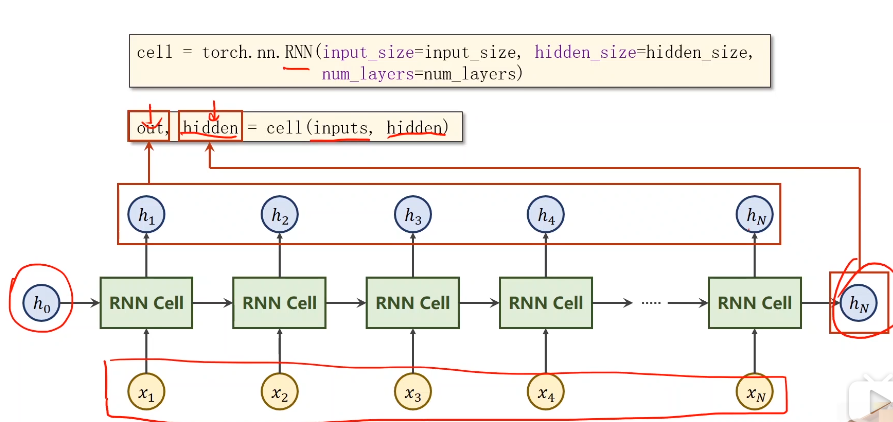

numLayer是可能会有很多层
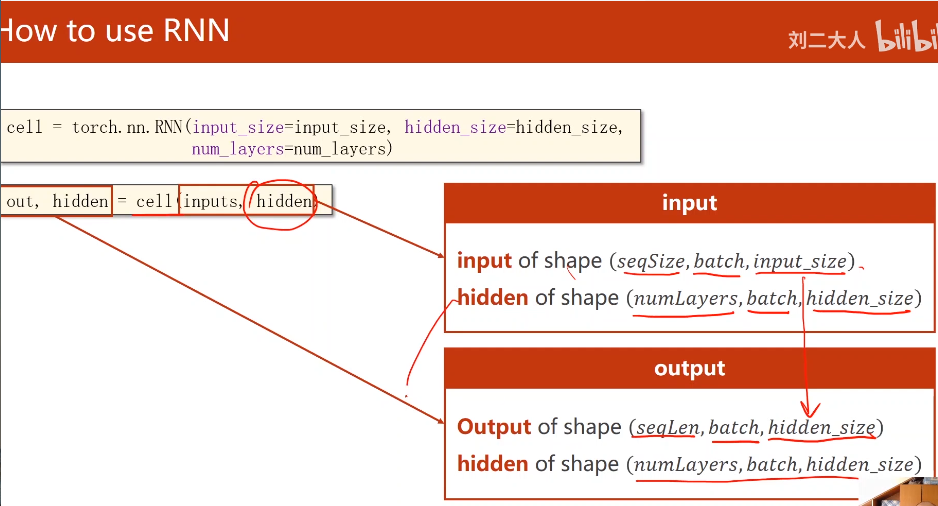

维度
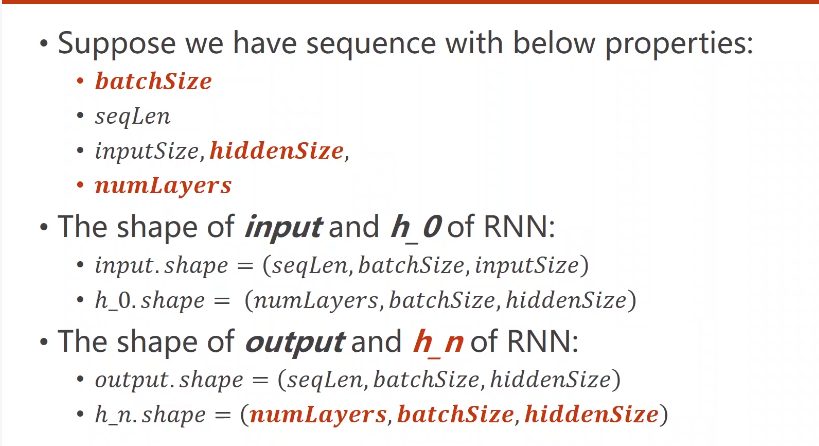

In [53]:
hidden

tensor([[[ 0.0942, -0.0413,  0.3452,  0.5115, -0.6046,  0.3983,  0.2444,
           0.1752,  0.1254,  0.5159]]], grad_fn=<StackBackward>)

In [44]:
inputs

tensor([[[ 1.4484, -1.9887, -0.7840, -0.0365]],

        [[-0.0113,  0.6948,  0.3096,  0.3948]],

        [[-0.4851, -1.1611,  1.0791,  0.4478]]])

In [52]:
# 小批量多大
batch_size = 1
# 有几个小批量，数据的输入长度
seq_len = 3
# 每个数据多长
input_size = 4
# 隐层的大小
hidden_size = 10
# RNN的层数/隐层的层数
num_layers = 1

cell = torch.nn.RNN(input_size=input_size, hidden_size=hidden_size,
                    num_layers=num_layers)# 多少层RNN

# 各自多了一个维度
# inputs：有了序列的个数
# hidden：有了层数，可能多层rnn
inputs = torch.randn(seq_len, batch_size, input_size)
hidden =torch.zeros(num_layers ,batch_size, hidden_size)
# inputs 整个输入序列
out, hidden = cell(inputs, hidden)
print('Out size', out.shape)
print('Output',out)
print('Hidden size:', hidden.shape)
print('Hidden', hidden)

Out size torch.Size([3, 1, 10])
Output tensor([[[ 0.4083, -0.1567,  0.4997,  0.5458, -0.2033,  0.1130,  0.0490,
           0.2700, -0.1371,  0.5556]],

        [[ 0.1291, -0.2333,  0.3650,  0.0967, -0.6377, -0.0291,  0.1060,
           0.0037, -0.5687,  0.4360]],

        [[ 0.0942, -0.0413,  0.3452,  0.5115, -0.6046,  0.3983,  0.2444,
           0.1752,  0.1254,  0.5159]]], grad_fn=<StackBackward>)
Hidden size: torch.Size([1, 1, 10])
Hidden tensor([[[ 0.0942, -0.0413,  0.3452,  0.5115, -0.6046,  0.3983,  0.2444,
           0.1752,  0.1254,  0.5159]]], grad_fn=<StackBackward>)


交换seqLen和batchSize的位置，有的时候会更方便计算好像
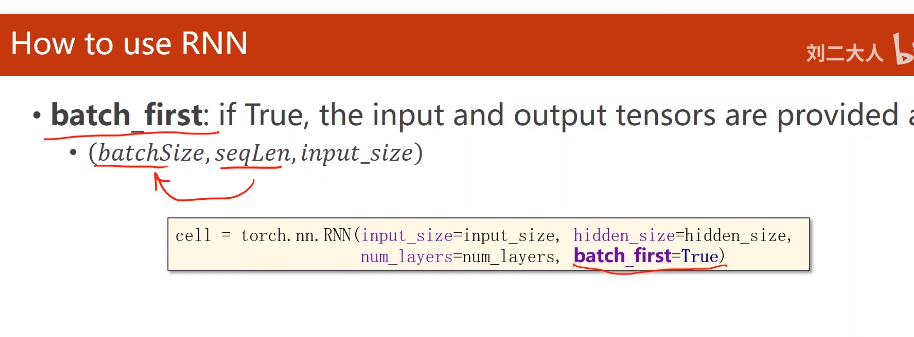

In [92]:
input_size = 4
hidden_size = 4
batch_size = 1

In [122]:
idx2char = ['e','h','l','o']
x_data = [1,0,2,2,3]
y_data = [3,1,2,3,2]

one_hot_lookup = [[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,0],
                 [0,0,0,1]]
x_one_hot = [one_hot_lookup[x] for x in x_data]

inputs = torch.Tensor(x_one_hot).view(-1,batch_size, input_size)
labels = torch.LongTensor(y_data).view(-1,1)

In [123]:
class Model(torch.nn.Module):
    def __init__(self,input_size, hidden_size, batch_size):
        super(Model, self).__init__()
        self.batch_size = batch_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        # 这里是RNNCell
        self.rnncell = torch.nn.RNNCell(input_size=self.input_size, 
                                       hidden_size=self.hidden_size)
    
    def forward(self,inputs,hidden):
        # 将输入和隐层转换成下一个隐层
        hidden = self.rnncell(inputs, hidden)
        return hidden
    
    # 生成默认初始隐藏层
    # 就在构造的时候用
    def init_hidden(self):
        return torch.zeros(self.batch_size, self.hidden_size)
# 构造的时候使用batch_size
net = Model(input_size, hidden_size, batch_size)

In [126]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=0.1)

In [127]:
for epoch in range(15):
    loss = 0
    optimizer.zero_grad()
    hidden = net.init_hidden()
    print('Predicted string:',end='\n')
    # inputs的shape(seqlen, batchsize, inputsize)
    # each_input的shape(batchsize, inputsize)
    for each_input,label in zip(inputs, labels):
        hidden = net(each_input, hidden)
        # 没有用item，因为所有的和才是最终的loss
        loss+=criterion(hidden, label)
       
        _, idx = hidden.max(dim=1)
        print(idx2char[idx.item()],end=",")
        #print(hidden)
    loss.backward()
    optimizer.step()
    print('Epoch[%d/15] loss=%.4f'%(epoch+1, loss.item()))

Predicted string:
h,o,h,o,e,Epoch[1/15] loss=7.0120
Predicted string:
o,o,o,o,l,Epoch[2/15] loss=5.9439
Predicted string:
o,o,l,o,l,Epoch[3/15] loss=5.1211
Predicted string:
o,o,l,l,l,Epoch[4/15] loss=4.6152
Predicted string:
o,o,l,l,l,Epoch[5/15] loss=4.3000
Predicted string:
o,h,l,l,l,Epoch[6/15] loss=4.0420
Predicted string:
o,h,l,o,l,Epoch[7/15] loss=3.8255
Predicted string:
o,h,l,o,l,Epoch[8/15] loss=3.5959
Predicted string:
o,h,l,o,l,Epoch[9/15] loss=3.3214
Predicted string:
o,h,l,o,l,Epoch[10/15] loss=3.0624
Predicted string:
o,h,l,o,l,Epoch[11/15] loss=2.8628
Predicted string:
o,h,l,o,l,Epoch[12/15] loss=2.6985
Predicted string:
o,h,l,o,l,Epoch[13/15] loss=2.5435
Predicted string:
o,h,l,o,l,Epoch[14/15] loss=2.3972
Predicted string:
o,h,l,o,l,Epoch[15/15] loss=2.2721


如果是RNN
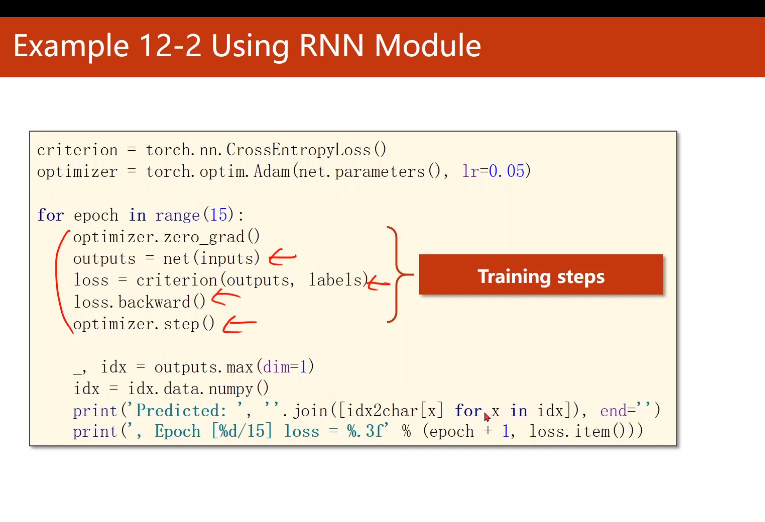

In [133]:
input_size = 4
hidden_size = 4
batch_size = 1
num_layers = 1
seq_len = 5

class Model(torch.nn.Module):
    def __init__(self,input_size, hidden_size, batch_size):
        super(Model, self).__init__()
        # 多了一个num_layers
        self.num_layers = num_layers
        self.batch_size = batch_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        # 这里是RNNCell
        self.rnn = torch.nn.RNN(input_size=self.input_size, 
                                       hidden_size=self.hidden_size,
                                   num_layers=self.num_layers)
    
    def forward(self,inputs):
        hidden =torch.zeros(self.num_layers, 
                            self.batch_size, 
                            self.hidden_size)
        # 将输入和隐层转换成下一个隐层
        out,_ = self.rnn(inputs, hidden)
        # (seqLen*batchSzie, hiddenSzie)
        return out.view(-1,self.hidden_size)
    
    # 生成默认初始隐藏层
    # 就在构造的时候用
    def init_hidden(self):
        return torch.zeros(self.batch_size, self.hidden_size)
# 构造的时候使用batch_size
net = Model(input_size, hidden_size, batch_size)

In [134]:
inputs = torch.Tensor(x_one_hot).view(seq_len,batch_size, input_size)
labels = torch.LongTensor(y_data)

In [135]:
for epoch in range(15):
    
    optimizer.zero_grad()
    outputs = net(inputs)
    #print(outputs)
    loss=criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    _, idx = outputs.max(dim=1)
    idx = idx.data.numpy()
    print(''.join(idx2char[x] for x in idx))
    print('Epoch[%d/15] loss=%.4f'%(epoch+1, loss.item()))

eeeeh
Epoch[1/15] loss=1.7383
eeeeh
Epoch[2/15] loss=1.7383
eeeeh
Epoch[3/15] loss=1.7383
eeeeh
Epoch[4/15] loss=1.7383
eeeeh
Epoch[5/15] loss=1.7383
eeeeh
Epoch[6/15] loss=1.7383
eeeeh
Epoch[7/15] loss=1.7383
eeeeh
Epoch[8/15] loss=1.7383
eeeeh
Epoch[9/15] loss=1.7383
eeeeh
Epoch[10/15] loss=1.7383
eeeeh
Epoch[11/15] loss=1.7383
eeeeh
Epoch[12/15] loss=1.7383
eeeeh
Epoch[13/15] loss=1.7383
eeeeh
Epoch[14/15] loss=1.7383
eeeeh
Epoch[15/15] loss=1.7383


In [136]:
inputs

tensor([[[0., 1., 0., 0.]],

        [[1., 0., 0., 0.]],

        [[0., 0., 1., 0.]],

        [[0., 0., 1., 0.]],

        [[0., 0., 0., 1.]]])

In [137]:
labels

tensor([3, 1, 2, 3, 2])

### Embedding 嵌入

 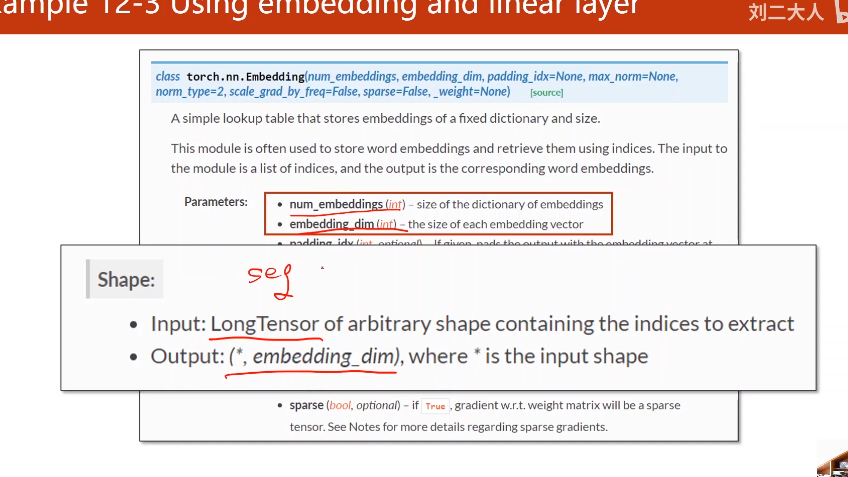

构建embedding矩阵
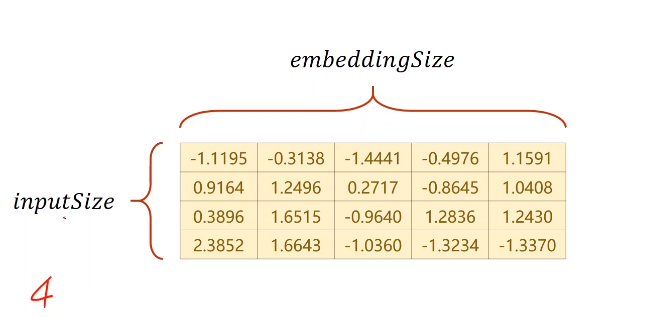

In [146]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # 添加嵌入层
        self.emb = torch.nn.Embedding(input_size, embedding_size)
        self.rnn = torch.nn.RNN(input_size=embedding_size,
                               hidden_size=hidden_size,
                               num_layers=num_layers,
                               batch_first=True)
        # 全连接层 hidden到类数
        self.fc = torch.nn.Linear(hidden_size, num_class)
    
    def forward(self, x):
        hidden = torch.zeros(num_layers, x.size(0), hidden_size)
        # 每次数据都要先处理
        x = self.emb(x)
        x,_ = self.rnn(x, hidden)
        x = self.fc(x)
        return x.view(-1,num_class)
                     

In [147]:
# 四类
num_class = 4
input_size = 4
# 八层hidden
hidden_size = 8
# 嵌入到十维空间
embedding_size = 10
# 两层RNN
num_layers = 2
batch_size = 1
# 序列长度为5
seq_len = 5

In [144]:
idx2char = ['e', 'h', 'l', 'o']
x_data = [[1, 0, 2, 2, 3]]#(batch, seq_len)
y_data = [3, 1, 2, 3, 2]#(batch, seq_len)

inputs = torch.LongTensor(x_data)
labels = torch.LongTensor(y_data)

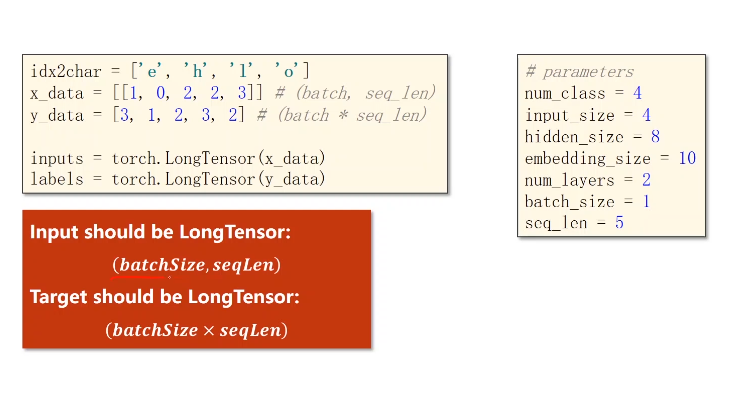

In [150]:
net = Model()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)

In [151]:
for epoch in range(15):
    
    optimizer.zero_grad()
    outputs = net(inputs)
    #print(outputs)
    loss=criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    _, idx = outputs.max(dim=1)
    idx = idx.data.numpy()
    print(''.join(idx2char[x] for x in idx))
    print('Epoch[%d/15] loss=%.4f'%(epoch+1, loss.item()))

eleeo
Epoch[1/15] loss=1.4354
oolol
Epoch[2/15] loss=1.1141
ohlol
Epoch[3/15] loss=0.8681
ohlol
Epoch[4/15] loss=0.7047
ohlol
Epoch[5/15] loss=0.5560
ohlol
Epoch[6/15] loss=0.4097
ohlol
Epoch[7/15] loss=0.2889
ohlol
Epoch[8/15] loss=0.1974
ohlol
Epoch[9/15] loss=0.1341
ohlol
Epoch[10/15] loss=0.0922
ohlol
Epoch[11/15] loss=0.0629
ohlol
Epoch[12/15] loss=0.0423
ohlol
Epoch[13/15] loss=0.0289
ohlol
Epoch[14/15] loss=0.0208
ohlol
Epoch[15/15] loss=0.0153


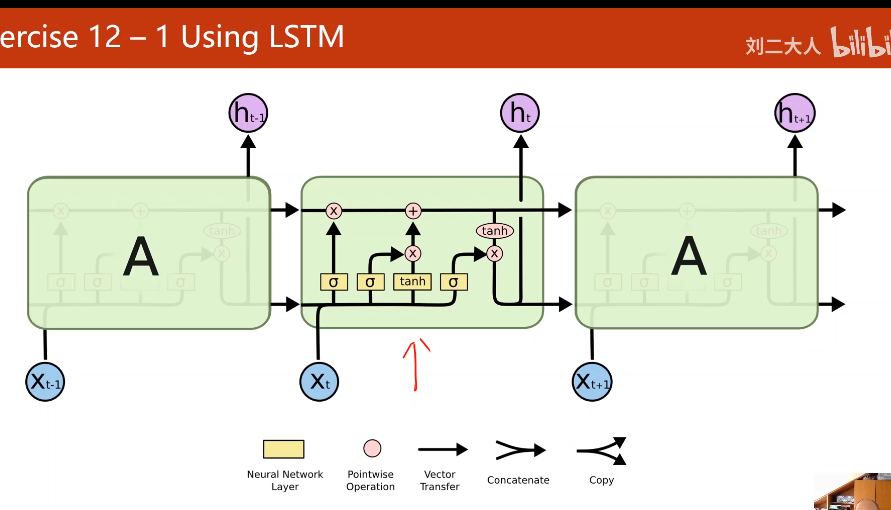